In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## Akshat Pandey Lab 1 PHYS 434

# A little Statistics

## 1. Normal Distribution
The normal distribution is a type of continuous distribution. It's general formula is $$\frac{1}{(\sigma\sqrt2\pi)}e^{-0.5(\frac{x-\mu}{\sigma})^2}$$
The parameters $\mu, \sigma$ stand for the mean and the standard deviation of the distribution. In our case, we will be looking at a special
case called the standard normal which has a mean of 0 and s.d of 1.

In [7]:
# Trying different values for sigma and checking for consistency on z-table
vals = [0, 1, 2, 5]
sigma_probs = 1 - stats.norm.cdf(vals)
print('The probabilities corresponding to the sigma values are ' + str(sigma_probs))
z_probs = stats.norm.cdf(vals)
print('The probabilities from the z_table corresponding to the sigma values are ' + str(z_probs))

The probabilities corresponding to the sigma values are [5.00000000e-01 1.58655254e-01 2.27501319e-02 2.86651572e-07]
The probabilities from the z_table corresponding to the sigma values are [0.5        0.84134475 0.97724987 0.99999971]


The sigma probabilities are consistent with the z-table probabilities since the sigma probabilites are the right hand integral while the z-table ones are left side integrals.

The values corresponding to the sigma values from the z-table are listed below

| Sigma Value | Z-Table Value |  Probability |   |   |
|-------------|---------------|---|---|---|
| 0           | 0.5           | 0.5  |   |   |
| 1           | 0.84          |  0.84 |   |   |
| 2           | 0.97          |  0.97 |   |   |
| 5           | 0.99          |  0.99 |   |   |

In [8]:
# Trying different values for probabilities and checking for consistency for sigma values
sigma_vals = stats.norm.ppf(z_probs)
print('The sigma values corresponding to known probabilities are ' + str(sigma_vals))

The sigma values corresponding to known probabilities are [0. 1. 2. 5.]


Once again, considering that sigma probabilities are right side integrals we can use the probabilities that should correspond to known sigma values to ensure that we have the right sigma values.

While there is no minus sign here, if there was one then I believe that it is referring to variance from the mean and not the probability.

## 2. Rayleigh Distribution
The Rayleigh distribution is a continuous probability distribution for non-negative valued random variables. It's general formula is $$\frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}}, for  x > 0$$
Here $\sigma$ is the scale parameter

In [9]:
d = stats.rayleigh.rvs(scale = 0.01, size = 100000)

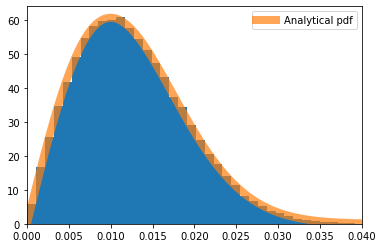

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.xlim([0, 0.04])
x = np.linspace(0, 0.04,1000)
ax.plot(x,stats.rayleigh.pdf(x, scale = 0.01),linewidth = 8,alpha = 0.7, label = 'Analytical pdf')
plt.legend()
plt.show()

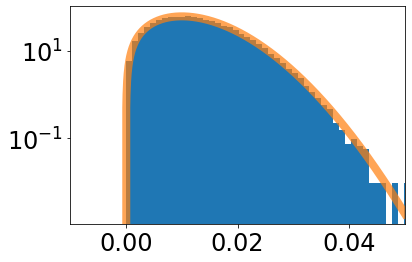

In [11]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-0.01,0.05])
x = np.linspace(0,0.05,1000)
ax.plot(x,stats.rayleigh.pdf(x, scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

## 3. Sigma Calculation
For the rayleigh distribution, the value chosen for the hypothetical measurement is 0.028.
The statistical question being asked will be: The probability of the background giving a data point that is as or more signal-like than the reading that I have is the same probability as if my data was X$\sigma$ away from the mean

The mathematical representation of this would be: $$\int_{0.028}^{\infty} \frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}} dx$$

In [25]:
prob = stats.rayleigh.cdf(0.028, scale = 0.01)
sigma_val = stats.rayleigh.ppf(prob)
print(prob)
print('The corresponding sigma value is ' + str(round(sigma_val,1)))

0.9801589052556297
The corresponding sigma value is 2.8


In [24]:
hypo_vals = [-0.004, 0.012, 0.023, 0.033]
hypo_probs = stats.rayleigh.cdf(hypo_vals, scale = 0.01)
hypo_sigmas = stats.rayleigh.ppf(hypo_probs)
print('The hypothetical probabilities are ' + str(hypo_probs))
print('The hypothetical sigma values are ' + str(hypo_sigmas))

The hypothetical probabilities are [0.         0.51324774 0.92899465 0.99568216]
The hypothetical sigma values are [0.  1.2 2.3 3.3]


The pattern that we see is that the sigma values and probabilities increase the closer we get to the extreme right limit of the distribution.

# Non-Continuous Distributions

## Binomial Distribution
The binomial distribution is the discrete probability distribution of the number of successes in a sequence of n independent experiments. It's general formula is $$\binom{n}{k} p^k (1-p)^{n-k}$$
The parameters n and p represent the number of tries, the probability of success, and k is the number of successes.

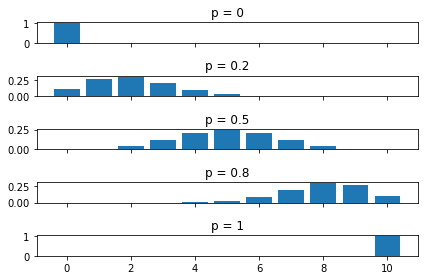

In [14]:
fig, axs = plt.subplots(5, sharex=True)
n = 10
x_values = list(range(n + 1)) 
axs[0].bar(r_values, [stats.binom.pmf(x, n, 0) for x in x_values])
axs[0].set_title('p = 0')
axs[1].bar(r_values, [stats.binom.pmf(x, n, 0.2) for x in x_values])
axs[1].set_title('p = 0.2')
axs[2].bar(r_values, [stats.binom.pmf(x, n, 0.5) for x in x_values])
axs[2].set_title('p = 0.5')
axs[3].bar(r_values, [stats.binom.pmf(x, n, 0.8) for x in x_values])
axs[3].set_title('p = 0.8')
axs[4].bar(r_values, [stats.binom.pmf(x, n, 1) for x in x_values])
axs[4].set_title('p = 1')
fig.tight_layout()
plt.show()

As we can see, as the probability for success increases the distribution shifts towards the right showing a higher change of more successful trials. When the probability for success is 0.5, the distribution resembles a normal distribution.

The statistical question being asked will be: The probability of the background giving a data point that is as or more signal-like than the reading that I have is the same probability as if my data was X$\sigma$ away from the mean.
Data point = 6 successes

In [32]:
# Probability associated to data point
probs_binom = stats.binom.cdf(6, 10, 0.6)
print('The probability is ' + str(round(probs_binom, 2)))

# Sigma associated to probability
sigma_binom = stats.binom.ppf(probs_binom, 10, 0.6)
print('The sigma value is ' + str(sigma_binom))

The probability is 0.62
The sigma value is 6.0


Given that we are working with a discrete distribution (binomial), this means that our experiment can only give a discrete result over a number of trials and each trial is independent of the other. This means that the experiment that we perform has to follow the idea of having discrete results and the sum of all the probabilities being equal to 1.

Considering the poisson distribution, the mean can have a non-discrete value since it is the average rate of occurence of an event. Given that it is an average it has no bound focing it to be a discrete value. Similarly, with the binomial distribution the probability of success also does not have to be discrete based on the inherent meaning of what probability is. 


Furthermore, the only aspect of the distributions that changes is the number of successful events. Hence, even though we only obtain discrete results, once we calculate the parameters (averages and probabilities) it is possible to obtain continuous results. 